# L10 Lotka Volterra

## Overview

The Lotka Volterra model is a phenomenological model that describes the interactions between predator and prey species. It is a simple model with  complex dynamics. Despite its simplicity, the model can help us understand the fluctuations of predator prey systems in nature. Here we will integrate the lotka volterra equations numerically to explore these dynamics and the assumptions of the model.

In [ ]:
%reset

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


### The Lotka Volterra Equations

$\large f_1(x,y) = \frac{dx}{dt}=ax-bxy$

$\large f_2(x,y) = \frac{dy}{dt}=-cy+dxy$

#### QUESTION 1, 2:
1. From the equations above, which species (x, y) is the predator and which is the prey? 
2. Explain what each of the different parameters (a,b,c,d) represent? 


### Fixed Points
From this non-linear equation, we can identify the fixed points (or steady-states) where the rates of change are both equal to 0.

$\large \frac{dx}{dt}=ax^*-bx^*y^*=0$

$\large \frac{dy}{dt}=-cy^*+dx^*y^*=0$

One trivial solution is $(x^*=0,y^*=0)$, at this point there are no organisms and nothing happens.

Another steady state is found by solving the equations above:

$ax^*-bx^*y^*=0$

$ax^*=bx^*y^*$

$\large y^*=\frac{a}{b}$

$-cy^*+dx^*y^*=0$

$dx^*y^*=cy^*$

$\large x^*=\frac{c}{d}$


### Linear Stability Analysis

We may be able to see from the equations that the fixed point (0,0) is unstable (it's a saddle point where the dynamics approach the fixed point from the y-axis and move away along the x-axis). For the other, non-trivial, fixed point it is more dificult to determine the stability. We will thus turn to the mathematical formulation of linear stablility analysis.

We will linearize the equations around the fixed point and identify the local stability of the points. To do this, we compute the [Jacobian matrix](https://www.youtube.com/watch?v=bohL918kXQk) of the non-linear differential equations, and calculate the eigen values of the Jacobian at the fixed point. If the [eigen values](https://www.youtube.com/watch?v=PFDu9oVAE-g) are all <0 the fixed point is stable.

Jacobian Matrix (J)

$J = \begin{pmatrix} \frac{df_1}{dx} & \frac{df_1}{dy} \\ \frac{df_2}{dx} & \frac{df_2}{dy} \end{pmatrix} = \begin{pmatrix} a-by & -bx \\ dy & -c+dx \end{pmatrix}$

To find the eigen values at the fixed point $(x^*,y^*)$ we set the determinant of the Jacobian minus a constant $\lambda$ multiplied by the identity matrix equal to 0. Solving for $\lambda$ gives us the eigen values:

$det(J_{x^*,y^*}-\lambda I)=0$

We will evaluate the stability at the non-trival fixed point $(x^*=\frac{c}{d},y^*=\frac{a}{b})$:

$det \begin{pmatrix} -\lambda & \frac{-bc}{d} \\ \frac{da}{b} & -\lambda \end{pmatrix} = 0 $

$\lambda^2 + \frac{bc}{d} \frac{da}{b} = 0$

$\lambda^2 = -ac$

$\lambda = \pm i \sqrt{ac}$

From this analysis we can see that our eign values are purely imaginary. They have real part equal to 0 and imaginary parts going as the square root of the two parameters a and c. The real part being equal to 0 means that this fixed point is neither stable or unstable. It is called "neutral", and dynamics will not move towards or away from this fixed point. The imaginary part tells us that these dynamics have some form of rotation with a characteristic frequency:

Characteristic frequency $\omega$:

$\omega = \sqrt{\lambda_1 \lambda_2} = \sqrt{ac}$

Period $T$:

$T=\frac{2\pi}{\omega} = \frac{2pi}{\sqrt{ac}}$

### Numerical Integration

Now that we have explored these equations analytically, let's integrate them numerically to better understand what's going on and the assumptions we have made.


In [2]:
# Define function
def LV_dynamics(t,y,a,b,c,d):    
    #y = species x, species y
    dydt = np.zeros(2)
    dydt[0] = a*y[0] - b*y[0]*y[1]
    dydt[1] = -c*y[1]+d*y[0]*y[1]
    
    return dydt

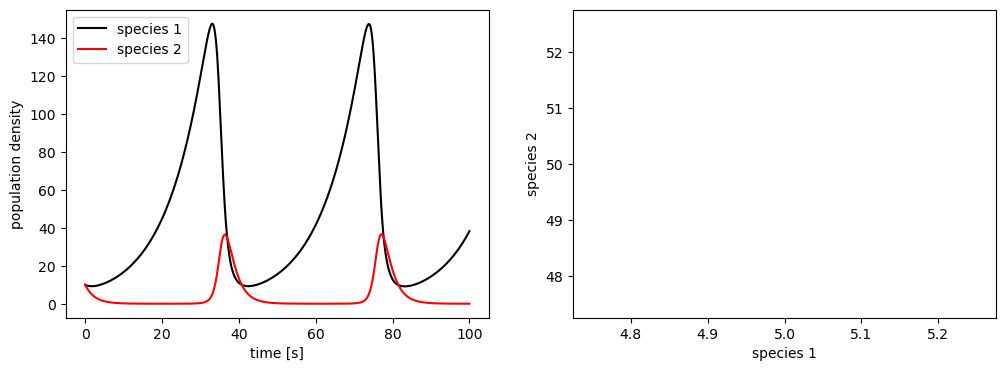

In [26]:
# Simulate Dynamics
a = 0.1
b = 0.02
c = 0.5
d = 0.01

# Initial Conditions
y0 = [10,10]
# time span
t = np.linspace(0,100,1000)
# t = np.linspace(0,10,1000)

tspan = [t[0],t[-1]]
# numerical integration
ode_sol = solve_ivp(lambda t,y:LV_dynamics(t,y,a,b,c,d),tspan,y0,t_eval=t)

# plot dynamics
[fig,axs] = plt.subplots(1,2,figsize=[12,4])
axs[0].plot(t,ode_sol.y[0],'k-')
axs[0].plot(t,ode_sol.y[1],'r-')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('population density')
axs[0].legend(['species 1','species 2'])

axs[1].plot(ode_sol.y[0],ode_sol.y[1],'k-');
axs[1].set_xlabel('species 1')
axs[1].set_ylabel('species 2');


#### QUESTION 3

3. If b and d are 0 (there is not predator prey interaction) what are the dynamics of this system? Hint: you may need to shorten the time window to capture the dynamics.
   * a. Include a plot showing the new dynamics (species 1 and 2 plotted against time) in your answer.
   * b. Provide a brief explanation of the dynamics


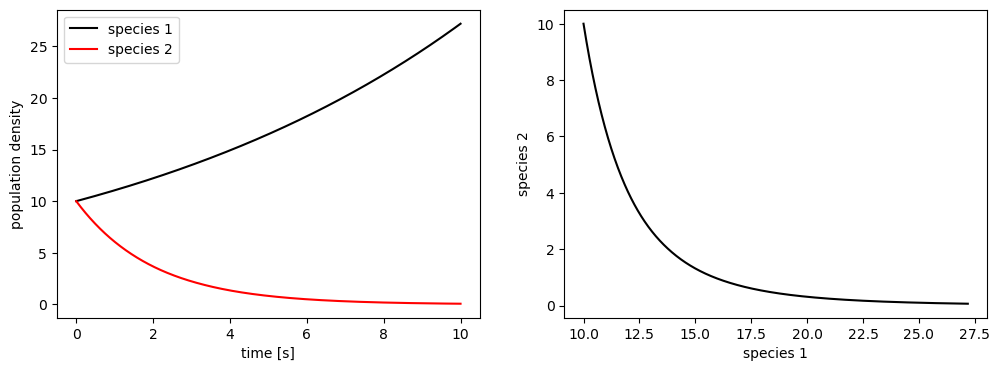

In [18]:
# Simulate Dynamics
a = 0.1
b = 0 # 0.02
c = 0.5
d = 0 # 0.01

# Initial Conditions
y0 = [10,10]
# time span
# t = np.linspace(0,100,1000)
t = np.linspace(0,10,1000)

tspan = [t[0],t[-1]]
# numerical integration
ode_sol = solve_ivp(lambda t,y:LV_dynamics(t,y,a,b,c,d),tspan,y0,t_eval=t)

# plot dynamics
[fig,axs] = plt.subplots(1,2,figsize=[12,4])
axs[0].plot(t,ode_sol.y[0],'k-')
axs[0].plot(t,ode_sol.y[1],'r-')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('population density')
axs[0].legend(['species 1','species 2'])

axs[1].plot(ode_sol.y[0],ode_sol.y[1],'k-');
axs[1].set_xlabel('species 1')
axs[1].set_ylabel('species 2');

### Steady-States

In the [Volterra paper](https://www.nature.com/articles/118558a0), this model was used to explain the change in fish populations during WWI. This explanation arose from looking at how the steady-state populations of predator and prey changed as a function of the parameters of the model.

#### QUESTION 4:
4. Add the steady state values to the two figures in the subplots above (species 1 and 2 vs time and species 1 vs species 2). Include the new figures in your answer.
   * a. Add two dotted lines (one for the steady state of each species) on the left figure.
   * b. Add and one point on the right figure.

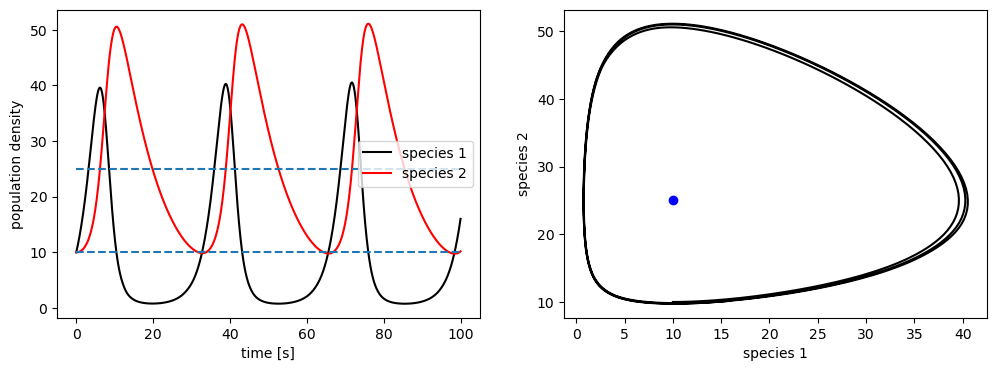

In [37]:
# Simulate Dynamics
a = .5 # 0.1
b = 0.02
c = .1 # 0.5
d = 0.01

# Initial Conditions
y0 = [10,10]
# time span
t = np.linspace(0,100,1000)

tspan = [t[0],t[-1]]
# numerical integration
ode_sol = solve_ivp(lambda t,y:LV_dynamics(t,y,a,b,c,d),tspan,y0,t_eval=t)

# plot dynamics
[fig,axs] = plt.subplots(1,2,figsize=[12,4])
axs[0].plot(t,ode_sol.y[0],'k-')
axs[0].plot(t,ode_sol.y[1],'r-')
axs[0].hlines(a/b,0,100, linestyle='dashed')
axs[0].hlines(c/d,0,100, linestyle='dashed')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('population density')
axs[0].legend(['species 1','species 2'])

axs[1].plot(ode_sol.y[0],ode_sol.y[1],'k-');
axs[1].plot(c/d,a/b, 'bo')

axs[1].set_xlabel('species 1')
axs[1].set_ylabel('species 2');

#### QUESTION 5
5. Change the parameters a and c in accordance with the assumptions from the Volterra paper. Assume that the changed parameters represent the wartime scenario.
   * a. Explain the changes you make to the parameters in the context of the fishing example given in the Volterra paper.
   * c. Explain how the steady state change as these parameters were changed?
   * b.  Recreate the plot on the right (species 1 vs species 2) showing the dynamics and steady-states of both systems (original and changed parameters) on the same plot.

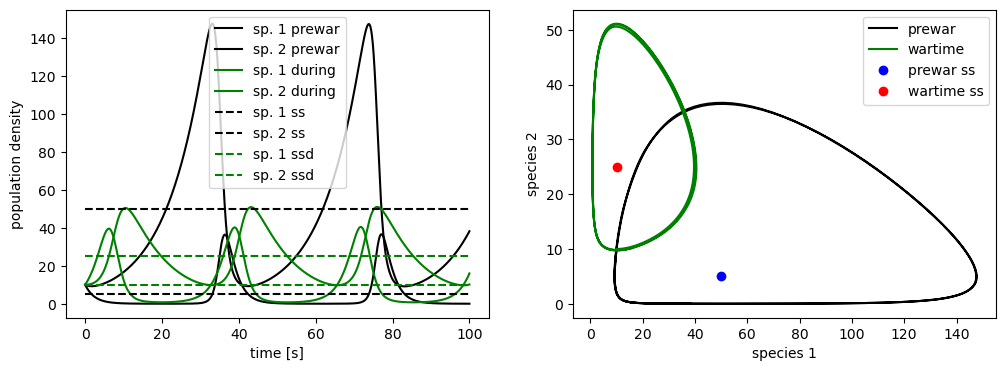

In [59]:
# Simulate Dynamics
a = 0.1
a_ = .5
b = 0.02
c = 0.5
c_ = .1
d = 0.01

# Initial Conditions
y0 = [10,10]
# time span
t = np.linspace(0,100,1000)

tspan = [t[0],t[-1]]
# numerical integration
ode_sol = solve_ivp(lambda t,y:LV_dynamics(t,y,a,b,c,d),tspan,y0,t_eval=t)
ode_sol2 = solve_ivp(lambda t,y:LV_dynamics(t,y,a_,b,c_,d),tspan,y0,t_eval=t)

# plot dynamics
[fig,axs] = plt.subplots(1,2,figsize=[12,4])
axs[0].plot(t,ode_sol.y[0],'k-')
axs[0].plot(t,ode_sol.y[1],'k-')
axs[0].plot(t,ode_sol2.y[0],'-g')
axs[0].plot(t,ode_sol2.y[1],'-g')
axs[0].hlines(a/b,0,100, linestyle='dashed', color='black')
axs[0].hlines(c/d,0,100, linestyle='dashed', color='black')

axs[0].hlines(a_/b,0,100, linestyle='dashed', color='green')
axs[0].hlines(c_/d,0,100, linestyle='dashed', color='green')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('population density')
axs[0].legend(['sp. 1 prewar','sp. 2 prewar', 'sp. 1 during', 'sp. 2 during', 'sp. 1 ss', 'sp. 2 ss', 'sp. 1 ssd', 'sp. 2 ssd'])

axs[1].plot(ode_sol.y[0],ode_sol.y[1],'k-');
axs[1].plot(ode_sol2.y[0],ode_sol2.y[1],'g-');
axs[1].plot(c/d,a/b, 'bo')
axs[1].plot(c_/d,a_/b, 'ro')

axs[1].set_xlabel('species 1')
axs[1].set_ylabel('species 2');
axs[1].legend(['prewar', 'wartime', 'prewar ss', 'wartime ss'])

### BONUS: Oscilation Frequency and Analytical Assumptions

Our analysis shows us that the dynamics of the system exhibit neutral cycles with a characteristic period (time per cycle) of $T= \frac{2pi}{\sqrt{ac}}$. Let's calculate this value numerically to see how well our analytical finding holds up.


Analytical T [s]: 28.099
Numerical T [s]: 29.003


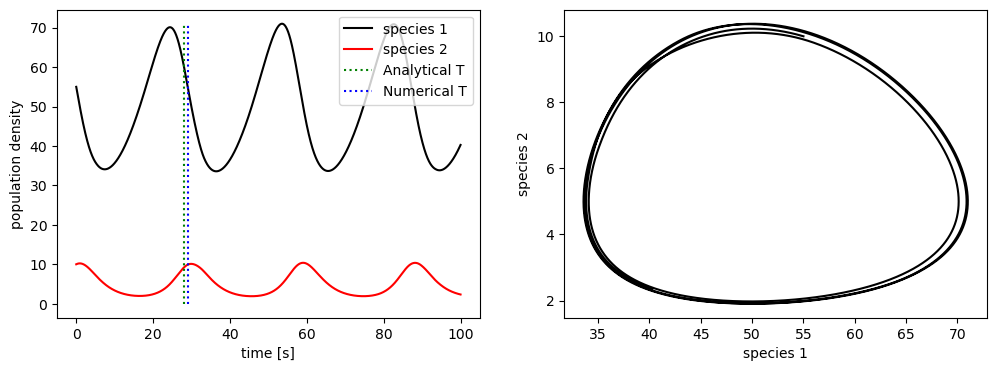

In [56]:
# Simulate Dynamics
a = 0.1
b = 0.02
c = 0.5
d = 0.01

# Initial Conditions
e = 5 #offset from fixed point
y0 = [c/d+e,a/b+e]
# time span
t = np.linspace(0,100,10000)
tspan = [t[0],t[-1]]
# numerical integration
ode_sol = solve_ivp(lambda t,y:LV_dynamics(t,y,a,b,c,d),tspan,y0,t_eval=t)

# plot dynamics
[fig,axs] = plt.subplots(1,2,figsize=[12,4])
axs[0].plot(t,ode_sol.y[0],'k-')
axs[0].plot(t,ode_sol.y[1],'r-')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('population density')

axs[1].plot(ode_sol.y[0],ode_sol.y[1],'k-');
axs[1].set_xlabel('species 1')
axs[1].set_ylabel('species 2');

# Calculate Period (Time to get back to initial condition)
#analytical calculation
T_a = 2*np.pi/np.sqrt(a*c)
axs[0].plot([T_a,T_a],[0,np.max(ode_sol.y)],'g:');

#numerical estimate
# calculate distance
dist = np.sqrt((ode_sol.y[0]-y0[0])**2+(ode_sol.y[1]-y0[1])**2)
# The period occurs at the second local minimum in the distance so we will use that to calculate it.
# Note: This may not hold if you change the way the initial conditions are formulated.
found1 = 0
found2 = 0
i = 0
while found2 == 0:
    i = i + 1
    if dist[i]<dist[i-1] and dist[i]<dist[i+1]:#local minimum
        if found1 == 0: #first
            found1 = 1
        else: #second
            found2 = 1
            index = i
T_e = t[index]
axs[0].plot([T_e,T_e],[0,np.max(ode_sol.y)],'b:');

# Plot distance to check numerical calculation
#axs[0].plot(t,dist,'b');

axs[0].legend(['species 1','species 2','Analytical T','Numerical T']);
print('Analytical T [s]:',np.round(T_a,3))
print('Numerical T [s]:',np.round(T_e,3))

We know that the analytical solutions we found are only valid for solutions near the fixed point. We can use the variable e to move the initial condition away from the fixed point and see how the period of the oscilation changes.

As the initial point moves further away from the fixed point the period increases and the analytical estimate becomes less and less accurate (it under-estimates the period).

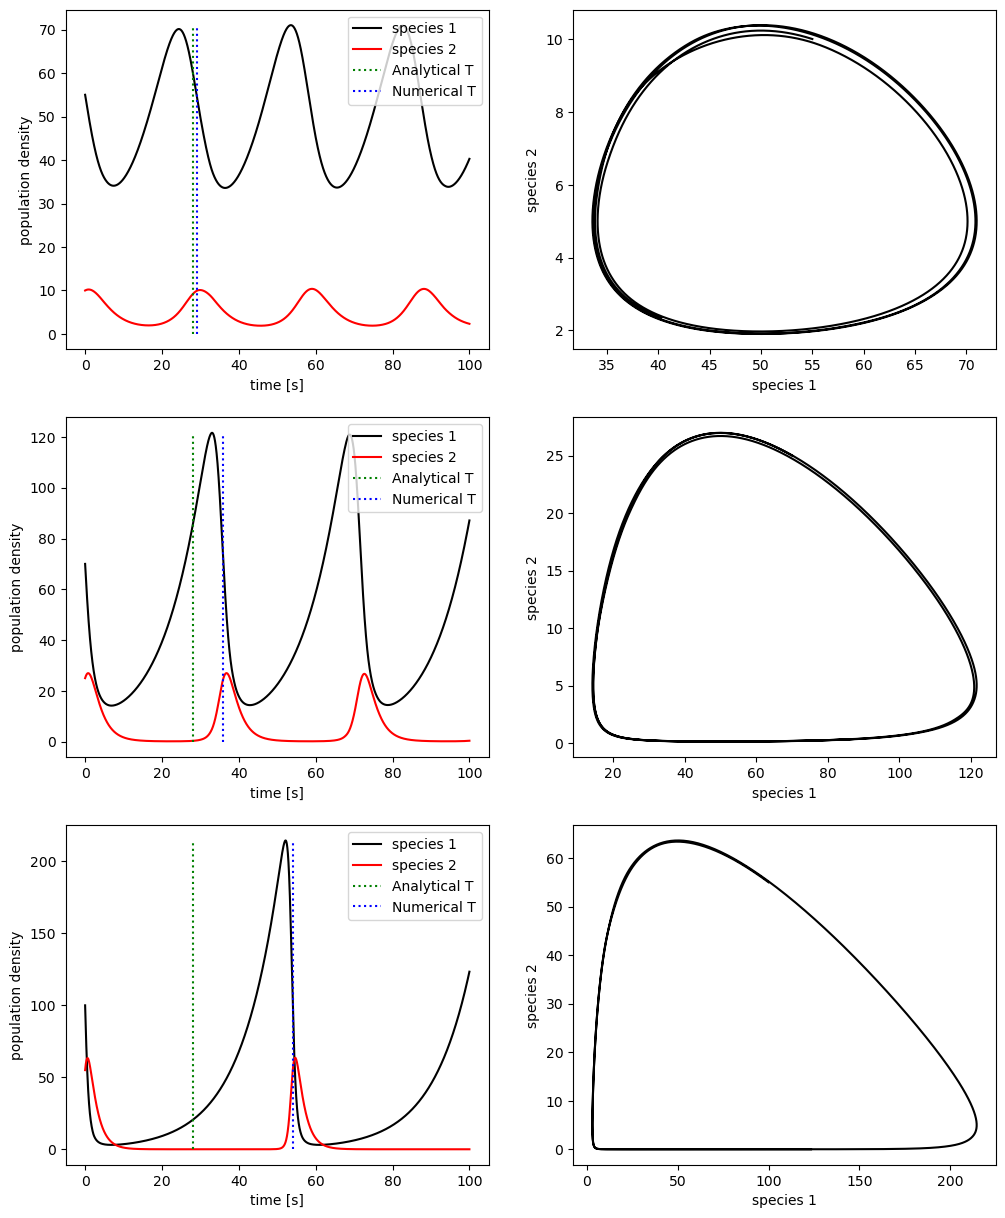

In [57]:
[fig,axs] = plt.subplots(3,2,figsize=[12,15])

# SOLUTION 6
# Simulate Dynamics
a = 0.1
b = 0.02
c = 0.5
d = 0.01

es = [5,20,50]
for p in range(3):
    # Initial Conditions
    e = es[p] #offset from fixed point
    y0 = [c/d+e,a/b+e]
    # time span
    t = np.linspace(0,100,10000)
    tspan = [t[0],t[-1]]
    # numerical integration
    ode_sol = solve_ivp(lambda t,y:LV_dynamics(t,y,a,b,c,d),tspan,y0,t_eval=t)

    # plot dynamics
    axs[p,0].plot(t,ode_sol.y[0],'k-')
    axs[p,0].plot(t,ode_sol.y[1],'r-')
    axs[p,0].set_xlabel('time [s]')
    axs[p,0].set_ylabel('population density')

    axs[p,1].plot(ode_sol.y[0],ode_sol.y[1],'k-');
    axs[p,1].set_xlabel('species 1')
    axs[p,1].set_ylabel('species 2');

    # Calculate Period (Time to get back to initial condition)
    #analytical calculation
    T_a = 2*np.pi/np.sqrt(a*c)
    axs[p,0].plot([T_a,T_a],[0,np.max(ode_sol.y)],'g:');

    #numerical estimate
    # calculate distance
    dist = np.sqrt((ode_sol.y[0]-y0[0])**2+(ode_sol.y[1]-y0[1])**2)
    # The period occurs at the second local minimum in the distance so we will use that to calculate it.
    # Note: This may not hold if you change the way the initial conditions are formulated.
    found1 = 0
    found2 = 0
    i = 0
    while found2 == 0:
        i = i + 1
        if dist[i]<dist[i-1] and dist[i]<dist[i+1]:#local minimum
            if found1 == 0: #first
                found1 = 1
            else: #second
                found2 = 1
                index = i
    T_e = t[index]
    axs[p,0].plot([T_e,T_e],[0,np.max(ode_sol.y)],'b:');

    # Plot distance to check numerical calculation
    #axs[0].plot(t,dist,'b');

    axs[p,0].legend(['species 1','species 2','Analytical T','Numerical T']);